<a href="https://colab.research.google.com/github/DiannaKatayama/MACKENZIE/blob/main/ProjetoAnakiseExploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# Projeto de Análise Exploratória de Dados
---

<h1 align=left><font size = 6, style="color:rgb(200,0,0)">Billboard Hot 100</font></h1>
<hr>

In [ ]:
#@title Identificação

#@markdown Turma
Turma = "'An\xE1lise Explorat\xF3ria de Dados'" #@param {type:"string"}
#@markdown Integrantes do Grupo
Aluno1 = 'Allan Marcondes de Oliveira - 22010580' #@param {type:"string"}
Aluno2 = 'Daniel Rodrigues da Silva - 22521933' #@param {type:"string"}
Aluno3 = 'Dianna Mayumi Santos Katayama - 22501762' #@param {type:"string"}
Aluno4 = 'Nicolas Pinotti - 22514112' #@param {type:"string"}



# Problema 
  
Música é arte, é linguagem, é cultura, é terapia e também comunicação.
Ao longo das décadas, quais artistas se destacaram e encantaram populações com suas músicas? 
Hits, baladas, gêneros, energia da música...Enfim, existe um grupo de características que fazem mais sucesso?
Os hot 100 da Billboard e os mais populares do Spotify tem algo em comum?
Responderemos essas e mais algumas dessas questões com esta análise.

# Descrição e origem dos dados 

Os dados foram adquiridos do projeto TidyTuesday, a comunidade R é a responsável pela coleta semanal dos dados.
O dataset "billboard.csv" contém os rankings da Billboard Hot 100 dos anos 1958 a 2021. Alguns exemplos dos dados contidos no dataset são: nome do artista, data de entrada e saída do ranking, nome da música, posição no ranking, dentre outros dados que podem ser conferidos na íntegra na "Estrutura dos Dados".
O dataset "audio_features.csv" possui informações coletadas da API do Spotify, contém características musicais, como energia, valência, duração. A descrição completa pode ser vista na "Estrutura dos Dados".



Datasets billboard.csv e audio_feautes.csv adquiridos nestes endereços: "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-09-14/billboard.csv" e 
"https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-09-14/audio_features.csv"







# Aquisição dos Dados

Utilizamos a bibliotecas Pandas e Requests para fazer a aquisição dos datasets diretamente do GitHub, conforme as instruções do professor.
Após a aquisição, decidimos fazer um merge considerando a coluna song_id dos dataset e, criamos o df.billspot, decidimos excluir os campos com valores ausentes e duplicados e considerar apenas os campos com valores utilizáveis.






In [ ]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO
from tabulate import tabulate
import numpy as np


pd.options.display.max_columns = 50

In [ ]:
df_billboard = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-09-14/billboard.csv')
df_spotify = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-09-14/audio_features.csv')

In [ ]:
df_billspot = df_billboard.merge(df_spotify, on=['song_id','song','performer'], how='inner')
df_billspot = df_billspot.drop_duplicates()
df_billspot = df_billspot.dropna()

# Análise dos Dados


## Estrutura dos Dados

| Variável | Tipo | Descrição |
| -------- | -------- | -------- |
|  url  |  string  |  URL da lista da Billboard   |
|  week_id  |  string  |  Data  |
|  week_position  |  int64  |  Posição na semana de 1/100  |
|  song  |  string  |  Nome da música  |
|  performer  |  string  |  Nome do cantor(a)  |
|  song_id  |  string  |  ID (identificador) da música: música + cantor(a)  |
|  instance  |  int64  |  A instância indica quantas vezes a música aparece nas listas  |
|  previous_week_position  |  float64  |  Indica a posição que uma determinada música está subindo ou descendo na lista.  |
|  peak_position  |  int64  |  Posição mais alta que uma música alcançou.  |
|  weeks_on_chart  |  int64  |  Semanas nas paradas de sucesso.  |
|  spotify_genre  |  string  |  Gênero musical.  |
|  spotify_track_id  |  string  |  Identificador de uma faixa musical/ música.  |
|  spotify_track_preview_url  |  string  |  URL contendo uma prévia da música.  |
|  spotify_track_duration_ms  |  float64  |  Duração da música em milissegundos.  |
|  spotify_track_explicit  |  string  |  Indica se a música contém conteúdo explícito.  |
|  spotify_track_album  |  string  |  Nome do álbum  |
|  danceability  |  float64  |  mede o quanto uma musica é dançante. Métricas utilizadas no cálculo: Tempo, estabilidade rítmica, força do rítmo, regularidade. O valor 0.0 é menos dançante e 1.0 é mais dançável.  |
|  energy  |  float64  |  mensurada de 0.0 a 1.0, avalia as características de alcance dinâmico, percepção de volume, timbre, taxa de início e entropia. Se nenhuma nota for detectada, o valor será -1  |
|  key  |  float64  |  A chave geral estimada da faixa. Números inteiros são mapeados para notas usando a notação padrão de classe de pitch. Por exemplo, 0 = C, 1 = C♯/D♭, 2 = D, e assim por diante. Se nenhuma chave for detectada, o valor é -1.  |
|  loudness  |  float64  |  Calcula a intensidade da música em decibéis. OS valores, geralmente, variam entre -60 e 0 dB.  |
|  mode  |  float64  |  Modalidade da escala da música (maior ou menor).  |
|  speechiness  |  float64  |  Valor númerico que indica a presença de palavras faladas. Valores acima de 0.66 indicam que são exclusivamente de palavras faladas. Valores de 0.33 e 0.66, podem ser músicas que podem conter tanto música quanto fala. Abaixo de 0.33, provavelmente são músicas que não possuem características de fala.  |
|  acousticness  |  float64  |  Mede se a música contém poucos ou nenhum elemento acústico. A medida é calculada usando a presença de instrumentos acústicos, a densidade espectral e a complexidade harmônica.  |
|  instrumentalness  |  float64  |  O instrumentalness é uma métrica que prevê se uma faixa musical contém ou não vocais. Sons como "ooh" e "aah" são considerados instrumentais nesse contexto. Faixas de rap ou spoken word são claramente "vocais". Quanto mais próximo o valor de instrumentalness for de 1.0, maior a probabilidade de a faixa não conter conteúdo vocal. Valores acima de 0,5 são destinados a representar faixas instrumentais, mas a confiança é maior à medida que o valor se aproxima de 1.0.  |
|  liveness  |  float64  |  Mede a presença de uma audiência na gravação de uma música. Valores acima de 0,8 indica uma forte probabilidade de que a música tenha sido gravada ao vivo.  |
|  valence  |  float64  |  Medida de 0.0 a 1.0 que descreve a positividade musical transmitida por uma faixa. Faixas com alta valência soam mais positivas (por exemplo, felizes, alegres, eufóricas), enquanto faixas com baixa valência soam mais negativas (por exemplo, tristes, deprimidas, irritadas).  |
|  tempo  |  float64  |  Velocidade estimada geral de uma faixa em batidas por minuto (BPM).  |
|  time_signature  |  float64  |  Refere-se ao número de batidas em cada medida ou compasso. Por exemplo, um tempo de assinatura de 4/4 indica que há 4 batidas em cada medida e que a nota de batida é uma quarto de nota.  |
|  spotify_track_popularity  |  float64  |  Popularidade da música no Spotify, medida pela quantidade de reproduções e na velocidade que se tornou popular.  |

In [ ]:
# Tipos de dados
df_billspot.dtypes

url                           object
week_id                       object
week_position                  int64
song                          object
performer                     object
song_id                       object
instance                       int64
previous_week_position       float64
peak_position                  int64
weeks_on_chart                 int64
spotify_genre                 object
spotify_track_id              object
spotify_track_preview_url     object
spotify_track_duration_ms    float64
spotify_track_explicit        object
spotify_track_album           object
danceability                 float64
energy                       float64
key                          float64
loudness                     float64
mode                         float64
speechiness                  float64
acousticness                 float64
instrumentalness             float64
liveness                     float64
valence                      float64
tempo                        float64
t

In [ ]:
# Visualização inicial dos dados 
df_billspot.head(3)

,url,week_id,week_position,song,performer,song_id,instance,previous_week_position,peak_position,weeks_on_chart,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
18,http://www.billboard.com/charts/hot-100/1971-0...,5/1/1971,61,Don't Knock My Love - Pt. 1,Wilson Pickett,Don't Knock My Love - Pt. 1Wilson Pickett,1,96.0,61,2,"['brill building pop', 'classic rock', 'classi...",7cyLwgSVf3AnKXetNRWiTa,https://p.scdn.co/mp3-preview/5d3332b4ae616cd2...,136400.0,False,The Very Best Of Wilson Pickett,0.731,0.701,7.0,-8.722,0.0,0.0287,0.157,0.000007,0.0595,0.961,107.521,4.0,26.0
19,http://www.billboard.com/charts/hot-100/1971-0...,5/8/1971,41,Don't Knock My Love - Pt. 1,Wilson Pickett,Don't Knock My Love - Pt. 1Wilson Pickett,1,61.0,41,3,"['brill building pop', 'classic rock', 'classi...",7cyLwgSVf3AnKXetNRWiTa,https://p.scdn.co/mp3-preview/5d3332b4ae616cd2...,136400.0,False,The Very Best Of Wilson Pickett,0.731,0.701,7.0,-8.722,0.0,0.0287,0.157,0.000007,0.0595,0.961,107.521,4.0,26.0
20,http://www.billboard.com/charts/hot-100/1971-0...,5/15/1971,32,Don't Knock My Love - Pt. 1,Wilson Pickett,Don't Knock My Love - Pt. 1Wilson Pickett,1,41.0,32,4,"['brill building pop', 'classic rock', 'classi...",7cyLwgSVf3AnKXetNRWiTa,https://p.scdn.co/mp3-preview/5d3332b4ae616cd2...,136400.0,False,The Very Best Of Wilson Pickett,0.731,0.701,7.0,-8.722,0.0,0.0287,0.157,0.000007,0.0595,0.961,107.521,4.0,26.0


## Análise (pergunta) 1.

>> **Quais são os top 10 artistas que mais estiveram nas paradas de sucesso ao longo dos anos?**



| Posição | Artista | Ocorrências |
| -------- | -------- | -------- |
|  1  |  Madonna                    |  786  |
|  2  |  Kenny Chesney              |  710  |
|  3  |  Tim McGraw                 |  535  |
|  4  |  Jason Aldean               |  534  |
|  5  |  Billy Joel                 |  533  |
|  6  |  Chicago                    |  522  |
|  7  |  P!nk                       |  517  |
|  8  |  Brad Paisley               |  504  |
|  9  |  Rod Stewart               |  501  |
|  10  |  Daryl Hall John Oates      |  494  |

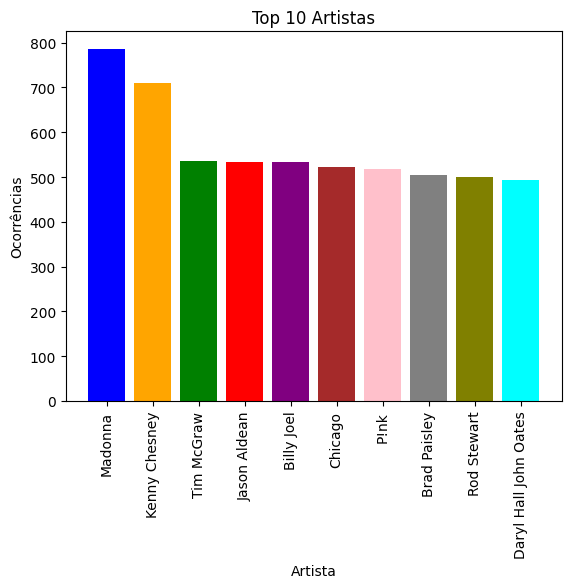

In [37]:
artista_counts = df_billspot.groupby('performer').size()
artista_counts = artista_counts.sort_values(ascending=False)
top_artistas = artista_counts[:10]

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
fig, ax = plt.subplots()
ax.bar(top_artistas.index, top_artistas.values, color=colors)
ax.set_title('Top 10 Artistas')
ax.set_xlabel('Artista')
ax.set_ylabel('Ocorrências')
plt.xticks(rotation=90)
plt.show()


top_artistas_data = df_billspot[df_billspot['performer'].isin(top_artistas.index)]


In [ ]:
top10 = df_billspot.groupby('performer',as_index=False)['instance'].count().sort_values('instance',ascending=False).head(10)
top10 = top10.reset_index(drop=True).rename({'performer':'Artista','instance':'Ocorrências'},axis=1)
top10

,Artista,Ocorrências
0,Madonna,786
1,Kenny Chesney,710
2,Tim McGraw,535
3,Jason Aldean,534
4,Billy Joel,533
5,Chicago,522
6,P!nk,517
7,Brad Paisley,504
8,Rod Stewart,501
9,Daryl Hall John Oates,494


In [ ]:
#@markdown ---
#@title Q1. Aponte os principais recursos empregados nesta pergunta aqui:

Q1a = "Frequencias Marginais dos Dados" #@param ["Entre com estatísticas descritivas empregadas", "Proporcoes dos dados", "Proporcoes de valores", "Medias e Desvio Padrao", "Quartis", "Frequencias Marginais dos Dados"] {type:"string"}
Q1b = "Exclusao de Nulos (dropna)" #@param ["Entre com uma transformacao de dados empregada", "Combinacao de dados (merge, join, concat)", "Mudancas de Formato (encode, substrings)", "Exclusao de Nulos (dropna)", "Adicao de Atributo Derivado"] {type:"string"}
Q1c = "Agregacao simples" #@param ["Entre com uma selecao de dados empregada", "Agregacao simples", "Agregacao multipla", "nlargest/nsmallest", "Selecao de dados multicondicional" , "Selecao de dados simples" ] {type:"string"}
Q1d = "Quantidades e Proporcoes (bar, pizza)" #@param ["Entre com uma visualizacao de dados empregada", "Evolucao dos dados (plot, lineplot)", "Distribuicao (hist, density, boxplot)", "Quantidades e Proporcoes (bar, pizza)", "Relacoes (scatterplot, pairplot, lmplot, heatmap)"] {type:"string"}
Q1e = "Subplots" #@param ["Entre com um recurso de visualizacao empregado", "Subplots", "Multiplas classes", "Ornamentos (cores, markers etc.)", "Inclusao de Texto no grafico", "Alteracao de Escalas"] {type:"string"}
Q1f = "Nesta an\xE1lise podemos verificar quais artistas estiveram mais vezes no Hot 100 da Billboard" #@param {type:"string"}


## Análise (pergunta) 2.

**Dentre os top 10 artistas, como se deu a evolução de permanencia no Hot 100 ao longo dos anos?**

O mapa de calor, apresentado abaixo, nos indica o números de semanas que estes artistas ficaram nas paradas de sucesso musical por ano.
Quanto mais escuro, mais tempo ele permaneceu na lista.

In [ ]:
#@markdown ---
#@title Q2. Aponte os principais recursos empregados nesta pergunta aqui:

Q2a = "Proporcoes dos dados" #@param ["Entre com estatísticas descritivas empregadas", "Proporcoes dos dados", "Proporcoes de valores", "Medias e Desvio Padrao", "Quartis", "Frequencias Marginais dos Dados"] {type:"string"}
Q2b = "Adicao de Atributo Derivado" #@param ["Entre com uma transformacao de dados empregada", "Combinacao de dados (merge, join, concat)", "Mudancas de Formato (encode, substrings)", "Exclusao de Nulos (dropna)", "Adicao de Atributo Derivado"] {type:"string"}
Q2c = "Agregacao simples" #@param ["Entre com uma selecao de dados empregada", "Agregacao simples", "Agregacao multipla", "nlargest/nsmallest", "Selecao de dados multicondicional" , "Selecao de dados simples" ] {type:"string"}
Q2d = "Relacoes (scatterplot, pairplot, lmplot, heatmap)" #@param ["Entre com uma visualizacao de dados empregada", "Evolucao dos dados (plot, lineplot)", "Distribuicao (hist, density, boxplot)", "Quantidades e Proporcoes (bar, pizza)", "Relacoes (scatterplot, pairplot, lmplot, heatmap)"] {type:"string"}
Q2e = "Subplots" #@param ["Entre com um recurso de visualizacao empregado", "Subplots", "Multiplas classes", "Ornamentos (cores, markers etc.)", "Inclusao de Texto no grafico", "Alteracao de Escalas"] {type:"string"}
Q2f = "O mapa de calor, apresentado abaixo, nos indica o n\xFAmeros de semanas que estes artistas ficaram nas paradas de sucesso musical por ano. Quanto mais escuro, mais tempo ele permaneceu na lista." #@param {type:"string"}


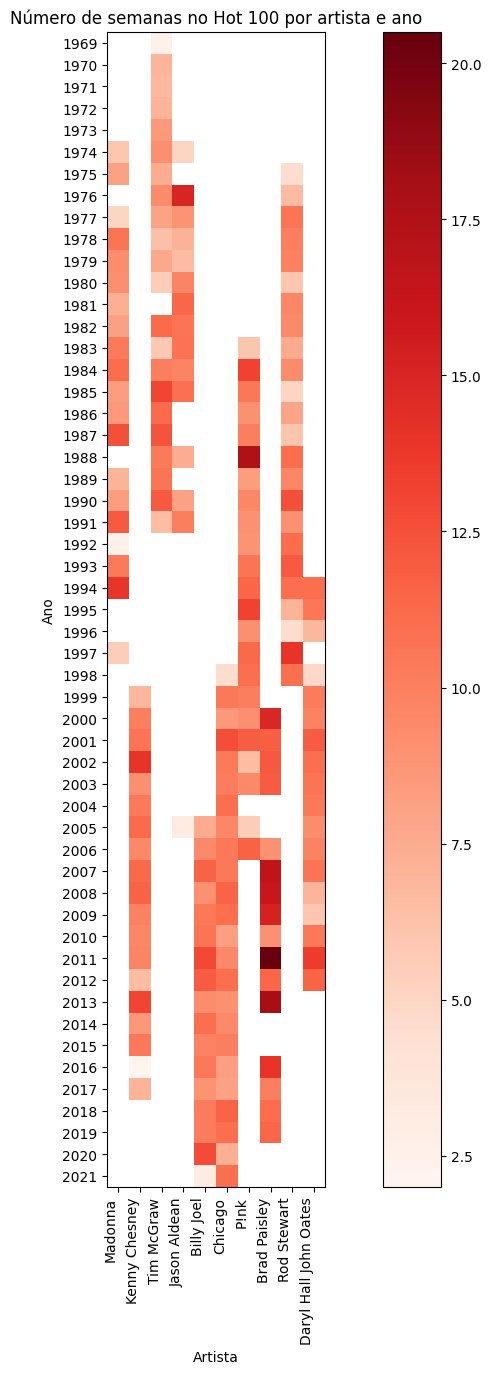

In [41]:
top_artistas_data = df_billspot[df_billspot['performer'].isin(top_artistas.index)].copy()
top_artistas_data['year'] = pd.to_datetime(top_artistas_data['week_id']).dt.year

heatmap_table = pd.pivot_table(top_artistas_data, values='weeks_on_chart', index=['year'], columns=['performer'])

fig, ax = plt.subplots(figsize=(15, 15))
im = ax.imshow(heatmap_table, cmap='Reds')

ax.set_title('Número de semanas no Hot 100 por artista e ano')
ax.set_xlabel('Artista')
ax.set_ylabel('Ano')
ax.set_xticks(np.arange(len(top_artistas.index)))
ax.set_xticklabels(top_artistas.index, rotation=90, ha='right')
ax.set_yticks(np.arange(len(heatmap_table.index)))
ax.set_yticklabels(heatmap_table.index)
plt.colorbar(im)

plt.show()

## Análise (pergunta) 3.

**Há alguma correlação entre as caracteríscas musicais presentes na base de dados do Spotify e a popularidade das músicas?**

**...**. ...

In [ ]:
#@markdown ---
#@title Q3. Aponte os principais recursos empregados nesta pergunta aqui:

Q3a = "Proporcoes dos dados" #@param ["Entre com estatísticas descritivas empregadas", "Proporcoes dos dados", "Proporcoes de valores", "Medias e Desvio Padrao", "Quartis", "Frequencias Marginais dos Dados"] {type:"string"}
Q3b = "Combinacao de dados (merge, join, concat)" #@param ["Entre com uma transformacao de dados empregada", "Combinacao de dados (merge, join, concat)", "Mudancas de Formato (encode, substrings)", "Exclusao de Nulos (dropna)", "Adicao de Atributo Derivado"] {type:"string"}
Q3c = "Agregacao simples" #@param ["Entre com uma selecao de dados empregada", "Agregacao simples", "Agregacao multipla", "nlargest/nsmallest", "Selecao de dados multicondicional" , "Selecao de dados simples" ] {type:"string"}
Q3d = "Relacoes (scatterplot, pairplot, lmplot, heatmap)" #@param ["Entre com uma visualizacao de dados empregada", "Evolucao dos dados (plot, lineplot)", "Distribuicao (hist, density, boxplot)", "Quantidades e Proporcoes (bar, pizza)", "Relacoes (scatterplot, pairplot, lmplot, heatmap)"] {type:"string"}
Q3e = "Ornamentos (cores, markers etc.)" #@param ["Entre com um recurso de visualizacao empregado", "Subplots", "Multiplas classes", "Ornamentos (cores, markers etc.)", "Inclusao de Texto no grafico", "Alteracao de Escalas"] {type:"string"}
Q3f = "O tempo n\xE3o mostra uma correla\xE7\xE3o forte com a popularidade das m\xFAsicas, mais lenta ou mais r\xE1pida, n\xE3o \xE9 um valor relevante. Energia e dan\xE7abilidade mostram uma maior relev\xE2ncia, por\xE9m n\xE3o se  mostrou determinante." #@param {type:"string"}


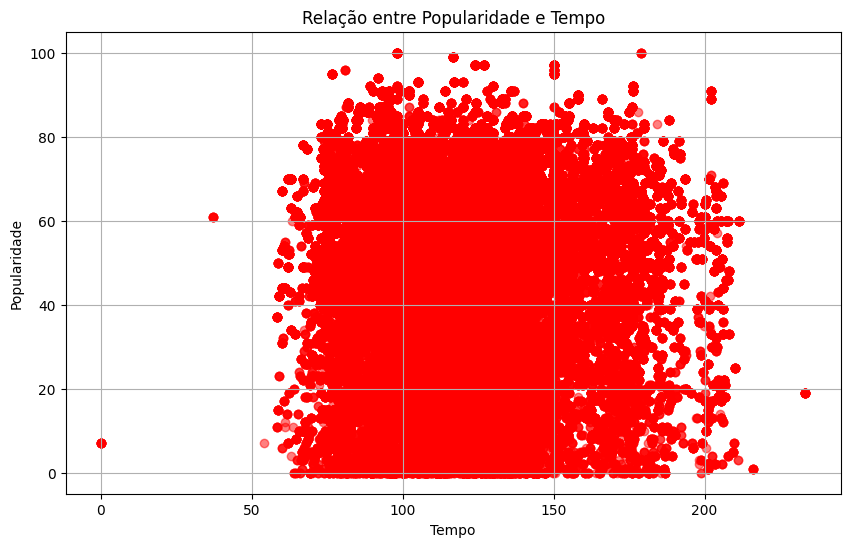

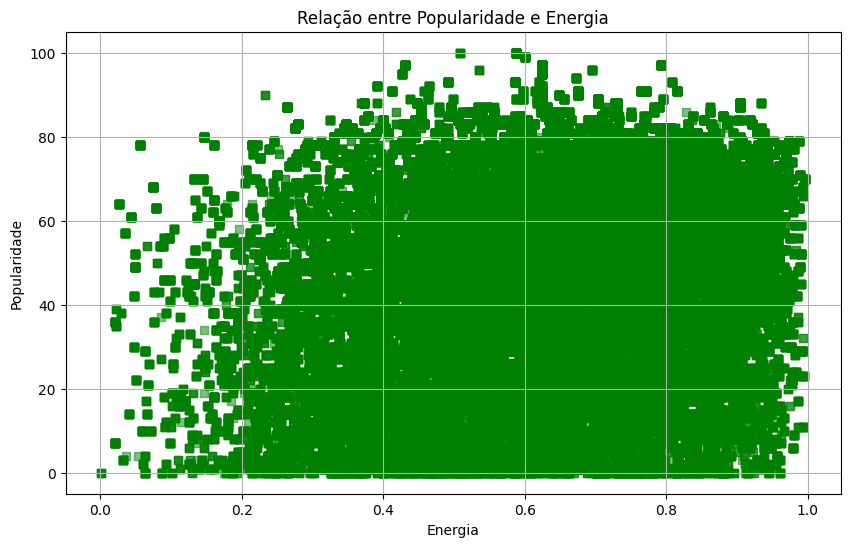

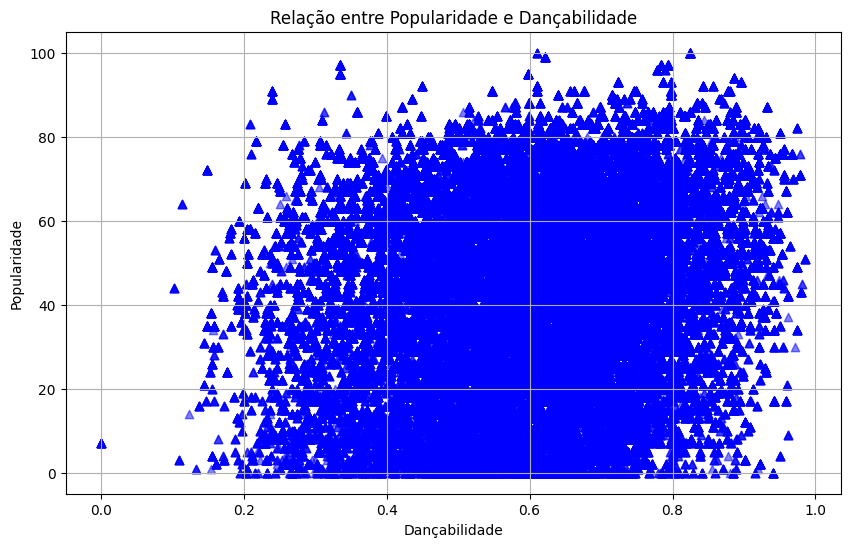

In [50]:
data = df_billspot[['spotify_track_popularity', 'tempo', 'energy', 'danceability']]

colors = ['red', 'green', 'blue']

plt.figure(figsize=(10, 6))

plt.scatter(data['tempo'], data['spotify_track_popularity'], color=colors[0], marker='o', alpha=0.5)
plt.title('Relação entre Popularidade e Tempo')
plt.xlabel('Tempo')
plt.ylabel('Popularidade')
plt.grid(True)

plt.show()

plt.figure(figsize=(10, 6))

plt.scatter(data['energy'], data['spotify_track_popularity'], color=colors[1], marker='s', alpha=0.5)
plt.title('Relação entre Popularidade e Energia')
plt.xlabel('Energia')
plt.ylabel('Popularidade')
plt.grid(True)

plt.show()

plt.figure(figsize=(10, 6))

plt.scatter(data['danceability'], data['spotify_track_popularity'], color=colors[2], marker='^', alpha=0.5)
plt.title('Relação entre Popularidade e Dançabilidade')
plt.xlabel('Dançabilidade')
plt.ylabel('Popularidade')
plt.grid(True)

plt.show()

## Análise (pergunta) 4.

**Quais gêneros musicais são mais populares?**

 As músicas foram agrupadas por gênero e foi calculada a média de popularidade para cada grupo.

In [ ]:
#@markdown ---
#@title Q4. Aponte os principais recursos empregados nesta pergunta aqui:

Q4a = "Entre com estatísticas descritivas empregadas" #@param ["Entre com estatísticas descritivas empregadas", "Proporcoes dos dados", "Proporcoes de valores", "Medias e Desvio Padrao", "Quartis", "Frequencias Marginais dos Dados"] {type:"string"}
Q4b = "Entre com uma transformacao de dados empregada" #@param ["Entre com uma transformacao de dados empregada", "Combinacao de dados (merge, join, concat)", "Mudancas de Formato (encode, substrings)", "Exclusao de Nulos (dropna)", "Adicao de Atributo Derivado"] {type:"string"}
Q4c = "Entre com uma selecao de dados empregada" #@param ["Entre com uma selecao de dados empregada", "Agregacao simples", "Agregacao multipla", "nlargest/nsmallest", "Selecao de dados multicondicional" , "Selecao de dados simples" ] {type:"string"}
Q4d = "Entre com uma visualizacao de dados empregada" #@param ["Entre com uma visualizacao de dados empregada", "Evolucao dos dados (plot, lineplot)", "Distribuicao (hist, density, boxplot)", "Quantidades e Proporcoes (bar, pizza)", "Relacoes (scatterplot, pairplot, lmplot, heatmap)"] {type:"string"}
Q4e = "Entre com um recurso de visualizacao empregado" #@param ["Entre com um recurso de visualizacao empregado", "Subplots", "Multiplas classes", "Ornamentos (cores, markers etc.)", "Inclusao de Texto no grafico", "Alteracao de Escalas"] {type:"string"}
Q4f = "" #@param {type:"string"}

NameError: ignored

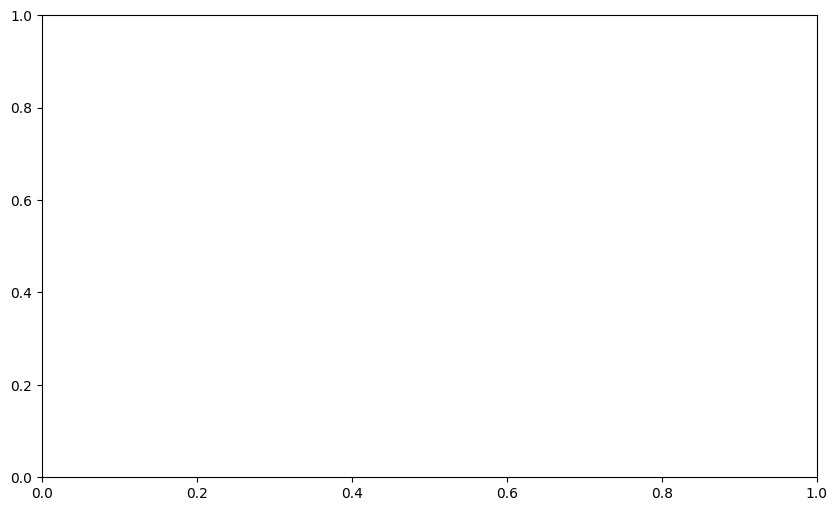

## Análise (pergunta) 5.

**Entre os motoristas envolvidos em acidentes quais apresentam maior dispersão de idade, homens ou mulheres?**

**...**. ...

In [ ]:
#@markdown ---
#@title Q5. Aponte os principais recursos empregados nesta pergunta aqui:

Q5a = "Entre com estatísticas descritivas empregadas" #@param ["Entre com estatísticas descritivas empregadas", "Proporcoes dos dados", "Proporcoes de valores", "Medias e Desvio Padrao", "Quartis", "Frequencias Marginais dos Dados"] {type:"string"}
Q5b = "Entre com uma transformacao de dados empregada" #@param ["Entre com uma transformacao de dados empregada", "Combinacao de dados (merge, join, concat)", "Mudancas de Formato (encode, substrings)", "Exclusao de Nulos (dropna)", "Adicao de Atributo Derivado"] {type:"string"}
Q5c = "Entre com uma selecao de dados empregada" #@param ["Entre com uma selecao de dados empregada", "Agregacao simples", "Agregacao multipla", "nlargest/nsmallest", "Selecao de dados multicondicional" , "Selecao de dados simples" ] {type:"string"}
Q5d = "Entre com uma visualizacao de dados empregada" #@param ["Entre com uma visualizacao de dados empregada", "Evolucao dos dados (plot, lineplot)", "Distribuicao (hist, density, boxplot)", "Quantidades e Proporcoes (bar, pizza)", "Relacoes (scatterplot, pairplot, lmplot, heatmap)"] {type:"string"}
Q5e = "Entre com um recurso de visualizacao empregado" #@param ["Entre com um recurso de visualizacao empregado", "Subplots", "Multiplas classes", "Ornamentos (cores, markers etc.)", "Inclusao de Texto no grafico", "Alteracao de Escalas"] {type:"string"}
Q5f = "" #@param {type:"string"}

In [ ]:
# Seu código

## Análise (pergunta) 6.

**A soma das despesas da administradora da Rodovia com acidentes fatais é inferior às despesas com os demais acidentes?**

**...**. ...

In [ ]:
#@markdown ---
#@title Q6. Aponte os principais recursos empregados nesta pergunta aqui:

Q6a = "Entre com estatísticas descritivas empregadas" #@param ["Entre com estatísticas descritivas empregadas", "Proporcoes dos dados", "Proporcoes de valores", "Medias e Desvio Padrao", "Quartis", "Frequencias Marginais dos Dados"] {type:"string"}
Q6b = "Entre com uma transformacao de dados empregada" #@param ["Entre com uma transformacao de dados empregada", "Combinacao de dados (merge, join, concat)", "Mudancas de Formato (encode, substrings)", "Exclusao de Nulos (dropna)", "Adicao de Atributo Derivado"] {type:"string"}
Q6c = "Entre com uma selecao de dados empregada" #@param ["Entre com uma selecao de dados empregada", "Agregacao simples", "Agregacao multipla", "nlargest/nsmallest", "Selecao de dados multicondicional" , "Selecao de dados simples" ] {type:"string"}
Q6d = "Entre com uma visualizacao de dados empregada" #@param ["Entre com uma visualizacao de dados empregada", "Evolucao dos dados (plot, lineplot)", "Distribuicao (hist, density, boxplot)", "Quantidades e Proporcoes (bar, pizza)", "Relacoes (scatterplot, pairplot, lmplot, heatmap)"] {type:"string"}
Q6e = "Entre com um recurso de visualizacao empregado" #@param ["Entre com um recurso de visualizacao empregado", "Subplots", "Multiplas classes", "Ornamentos (cores, markers etc.)", "Inclusao de Texto no grafico", "Alteracao de Escalas"] {type:"string"}
Q6f = "" #@param {type:"string"}


In [ ]:
# Seu código

# Conclusão

Com base nas suas análises o que você conclui? Essa é uma parte importante do seu trabalho. A análise de dados busca identificar aspectos e confirmar hipóteses sobre o dados para a tomada de decisões. Por exemplo, se em uma análise você chega a conclusão, a partir dos dados, que no período da noite existem mais acidentes fatais por excesso de velocidade, você pode propor aumentar o pedágio ou intensificar a fiscalização nesse horário. Ou em uma base de salários, se você identifica menores salários para as mulheres na empresa, por propor mudanças no recrutamento. Assim, não deixe de incluir nas suas conclusões recomendações ou decisões que você tomaria com base em suas análises e que resultados esperaria alcançar. Justifique, em todos os casos as suas conclusões.

---

In [ ]:
#@markdown ---
#@title Notas
Completo = 10 #@param {type:"slider", min:0, max:10, step:1}
#@markdown São apresentadas todas as 6 perguntas e empregadas estatísticas descritivas, seleções simples e múltiplas, agrupamentos e transformações dos dados. 
Relevancia = 9 #@param {type:"slider", min:0, max:10, step:1}
#@markdown O tema é abordado corretamente e as perguntas e análises pertinentes ao problema. 
Tecnicas = 10 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As técnicas de gadas estatíticas dos dados, seleções, agrupamentos e transformações são corretamente aplicadas
Apresentacao = 5 #@param {type:"slider", min:0, max:10, step:1}
#@markdown A apresentação dos resultados é clara e objetiva 
Conclusao = 3 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As conclusões são justificadas e relevantes
Bonus = 0.5 #@param {type:"slider", min:0, max:1, step:0.5}
#@markdown A critério do professor por inovações na abordagem e no uso de técnicas de Análise de Dados

#@markdown ---
#@markdown ### Apresentação
Datafolio = 0 #@param {type:"slider", min:0, max:10, step:1}
Video = 0 #@param {type:"slider", min:0, max:10, step:1}

#@markdown ### Sumário 
#@markdown ---

resumo = {}
for q in range(1,7):
  resumo[q] = []
  for t in ['a','b','c','d','e','f']:
    exec( 'resumo[q].append(Q' + str(q) + t + ')')

for q, recurso in resumo.items():
  for i in range(len(recurso)):
    if recurso[i][0:5] == 'Entre':
      recurso[i] = 'None'

print('Resumo')
print(60*'-')
for q in resumo:
  print('*** Questão: ', q)
  for r in resumo[q]:
    print(r)



Resumo
------------------------------------------------------------
*** Questão:  1
None
None
None
None
None

*** Questão:  2
None
None
None
None
None

*** Questão:  3
None
None
None
None
None

*** Questão:  4
None
None
None
None
None

*** Questão:  5
None
None
None
None
None

*** Questão:  6
None
None
None
None
None



In [ ]:
#@markdown ### Nota Final
Nota1 = Completo + Relevancia + Tecnicas + Apresentacao + Conclusao 
Nota2 = Datafolio + Apresentacao

nota = (Nota1 + Nota2) / 7 + Bonus  

nota = Nota1 / 5 + Bonus

print(f'Nota final do trabalho {nota :.2f}')



Nota final do trabalho 7.90
